In [2]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.cluster import KMeans
from gensim.models import KeyedVectors

In [3]:
# pip install git+git://github.com/scikit-learn/scikit-learn.git

In [3]:
# load the vocabulary
# wv = KeyedVectors.load("pizza.embeddings", mmap='r')
wv = KeyedVectors.load("Standalone_0.1/output_embedding/walker_random/cw_data.embeddings", mmap='r')

# Get the vectors from the vocubulary to cluster
X = wv[wv.wv.vocab]

# Initialise a model and fit it to the set
# kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [4]:
words = wv.wv.index2word

In [5]:
len(words)

26013

In [7]:
ssd = []
for k in range(1,20):
    model = KMeans(n_clusters=k, random_state=0)
    model = model.fit(X)
    ssd.append(model.inertia_)
    print(k,model.inertia_)

1 195395.69
2 173074.57114484187
3 159796.89460209885
4 154404.7812358056
5 149186.1173273346
6 144170.995233323
7 140616.35927481914
8 137785.5424140096
9 134629.37129243425
10 133824.0999240852
11 130201.74298060703
12 128833.74233667261
13 126103.71113616464
14 125445.85872162077
15 123519.04375888853
16 122822.12244298261
17 120938.2068707644
18 120514.47345833796
19 119183.3022007586


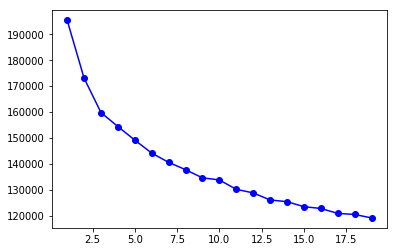

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(1,20),ssd,'bo-')
plt.show()

In [6]:
model = KMeans(n_clusters=10, random_state=0).fit(X)
# list(zip(words,model.labels_))

In [7]:
# Apply PCA and plot the clusters

In [8]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
# Load in the data
df = pd.DataFrame(X)
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)
# Create a PCA instance: pca
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

C:\Users\zacharias.detorakis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\zacharias.detorakis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Text(0, 0.5, 'PCA 2')

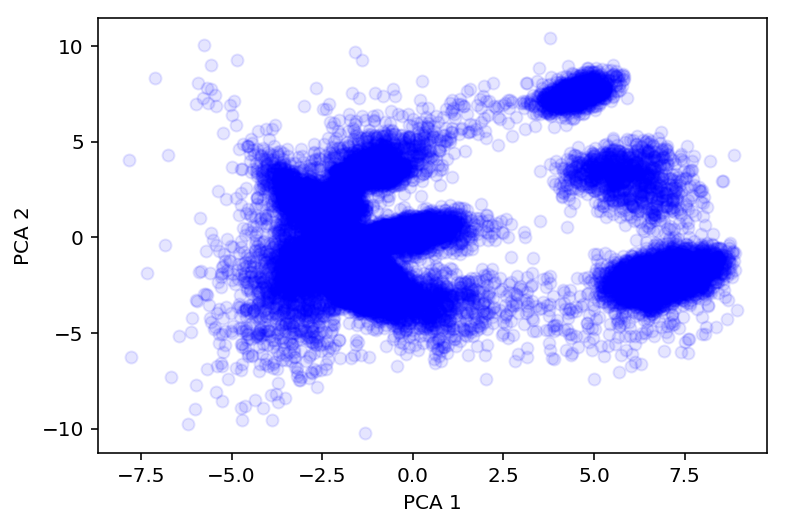

In [9]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='blue', )
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [10]:
PCA_components[0].shape

(26013,)

In [11]:
# color

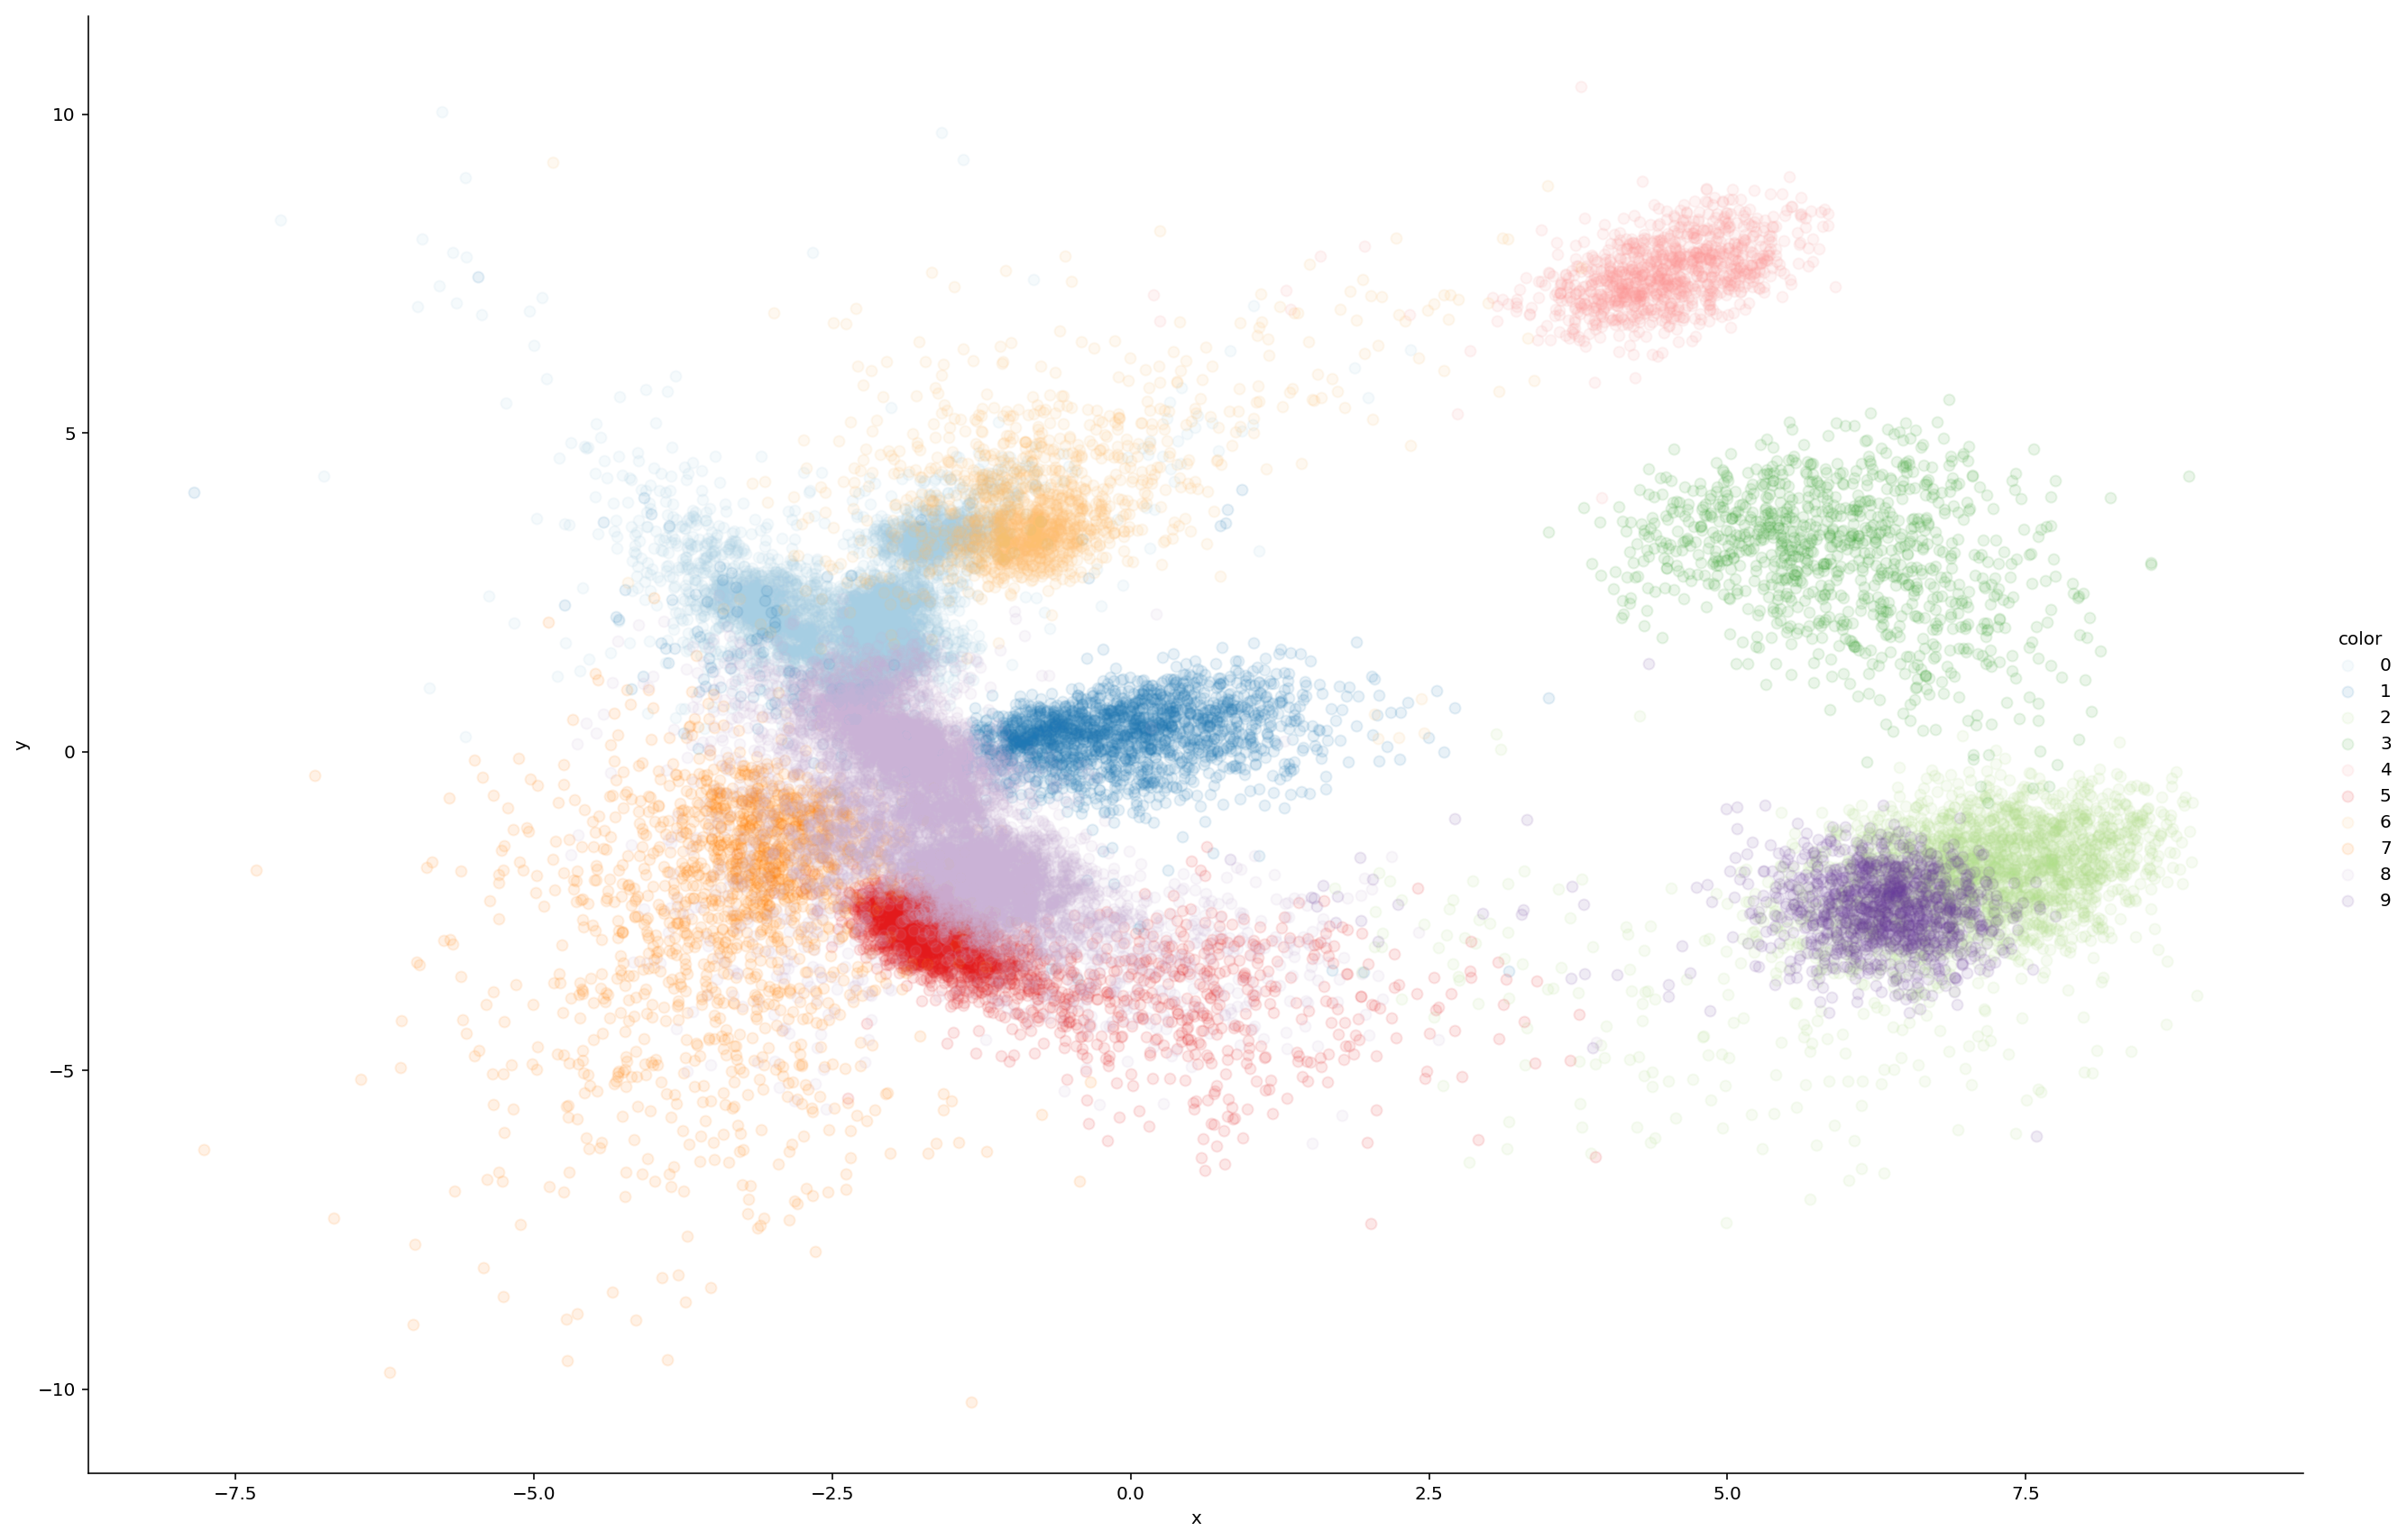

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

x = PCA_components[0]
y = PCA_components[1]
color = model.labels_

df = pd.DataFrame(dict(x=x, y=y, color=color))
# Create an array with the colors you want to use
sns.lmplot('x', 'y', data=df, hue='color', aspect=1.5, scatter_kws={'alpha':0.1}, fit_reg=False, height=12, palette = 'Paired' )

plt.show()

In [13]:
temp = model.labels_

In [14]:
type(temp)

numpy.ndarray